In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as ts

# 讀入 MNSIT 數據集

In [37]:
from tensorflow.keras.datasets import fashion_mnist

In [38]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 T-shirt/top


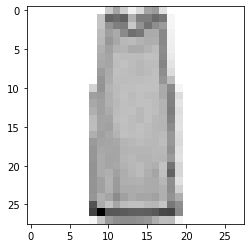

In [41]:
n = 9487
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')


# 欣賞數據集內容

In [42]:
len(x_train),len(x_test)

(60000, 10000)

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
28*28

784

# 資料整理

In [45]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
y_train =  to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 打造神經網路

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD 

In [50]:
model = Sequential()
model.add(Dense(87, input_dim=784, activation="relu")) 
model.add(Dense(87, activation="relu")) 
model.add(Dense(10, activation="softmax")) 
model.compile(loss='mse' , optimizer=SGD(lr=0.08) , metrics=['accuracy']) 

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 87)                68295     
_________________________________________________________________
dense_4 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train, y_train, batch_size=100, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0762 - accuracy: 0.4279
Epoch 2/15
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0483 - accuracy: 0.6667
Epoch 3/15
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0393 - accuracy: 0.7321
Epoch 4/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0344 - accuracy: 0.7790
Epoch 5/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0311 - accuracy: 0.8005
Epoch 6/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0289 - accuracy: 0.8120
Epoch 7/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0274 - accuracy: 0.8179
Epoch 8/15
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0264 - accuracy: 0.8238
Epoch 9/15
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0255 - accuracy: 0.8293
Epoch 10/15
60

# 結果

In [53]:
result = model.predict_classes(x_test)

神經網路預測是: Coat


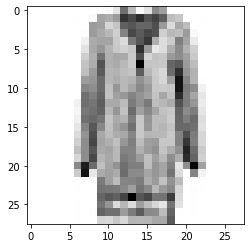

In [54]:
n = 9487
print('神經網路預測是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')